In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

from file import save_file


In [2]:
# Define the ticker symbol
tickerSymbol = 'MSFT'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
history = tickerData.history(interval='1wk', start='2021-1-1', end=date.today())

In [3]:
max_weeks = 50

In [4]:
# Calculate the percent change for the given period
option_leverage = {
    # 1: mean([405/8.07, 410/3.6]), # very negative -1200%
    2: mean([405/10.02, 410/5.52]),
    3: mean([405/11.35, 410/6.9]),
    4: mean([405/12.45, 410/8.62]),
    5: mean([405/13.5, 410/9.62]),
    6: mean([405/14.67, 410/11.3]),
    8: mean([410/13.2]),
    9: mean([405/17.75]),
    12: mean([410/17.22]),
    13: mean([405/21.35]),
    16: mean([410/22.45]),
    17: mean([405/25.77]),
    21: mean([410/26.2]),
    22: mean([405/29.45]),
    25: mean([410/29.33]),
    26: mean([405/32.45]),
    29: mean([410/34.55]),
    30: mean([405/36.77]),
    34: mean([410/37.52]),
    35: mean([405/39.8]),
    38: mean([410/39.45]),
    39: mean([405/42.32])
}
gap = (5/400)*100

stock_change = [None]
option_performance = []
for weeks in range(1, max_weeks):
    stock_changes = history['Close'].pct_change(periods=weeks) * 100
    stock_change.append(stock_changes.mean()  * 52 / weeks) # annualized

    if weeks in option_leverage:
        lvr = option_leverage[weeks]
        option_profits = stock_changes[weeks:].apply(lambda x: max(-100, (x - gap) * lvr - 100))
        mean_profit = option_profits.mean() #* 52 / weeks # annualized
        positive_percent = (option_profits > 0).mean() * 100
        option_performance.append([weeks, mean_profit, positive_percent])
        history[f'Option {weeks}w'] = option_profits # ? * 52 / weeks # annualized

In [5]:
print('Option performance (weeks, profit, positive):')
for p in option_performance:
    print(f'\t{p[0]:2}w {p[1]:4.0f}% {p[2]:3.0f}%')

Option performance (weeks, profit, positive):
	 2w   -0%  35%
	 3w   15%  37%
	 4w   20%  39%
	 5w   26%  42%
	 6w   26%  44%
	 8w   49%  50%
	 9w   20%  46%
	12w   67%  53%
	13w   44%  52%
	16w   64%  52%
	17w   49%  52%
	21w   82%  56%
	22w   67%  53%
	25w   92%  57%
	26w   78%  58%
	29w   85%  58%
	30w   75%  59%
	34w   87%  57%
	35w   77%  57%
	38w   91%  58%
	39w   80%  58%


In [6]:
save_file(tickerSymbol, option_performance)

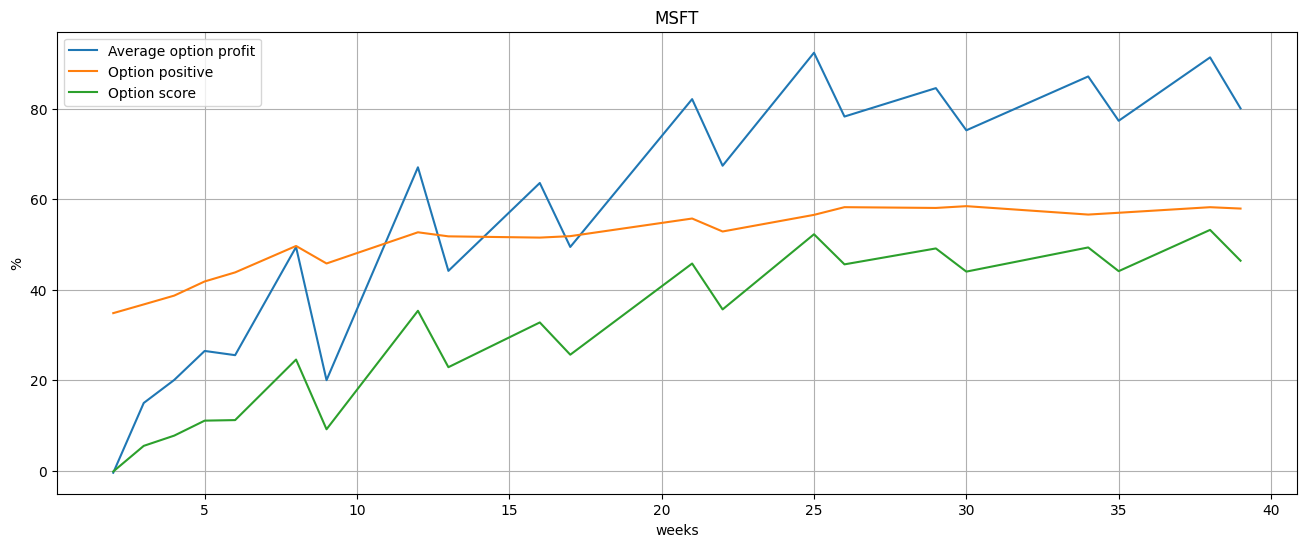

In [7]:
plt.figure(figsize=(16,6))
option_weeks = [p[0] for p in option_performance]
option_profit = [p[1] for p in option_performance]
option_positive = [p[2] for p in option_performance]
option_score = [x * y / 100 for x, y in zip(option_profit, option_positive)]
plt.plot(option_weeks, option_profit, label='Average option profit')
plt.plot(option_weeks, option_positive, label='Option positive')
plt.plot(option_weeks, option_score, label='Option score')
# plt.axhline(y=0, color='k', linestyle='--')
plt.legend(loc='upper left')
plt.title(tickerSymbol)
plt.xlabel('weeks')
plt.ylabel('%')
plt.grid()
plt.show()

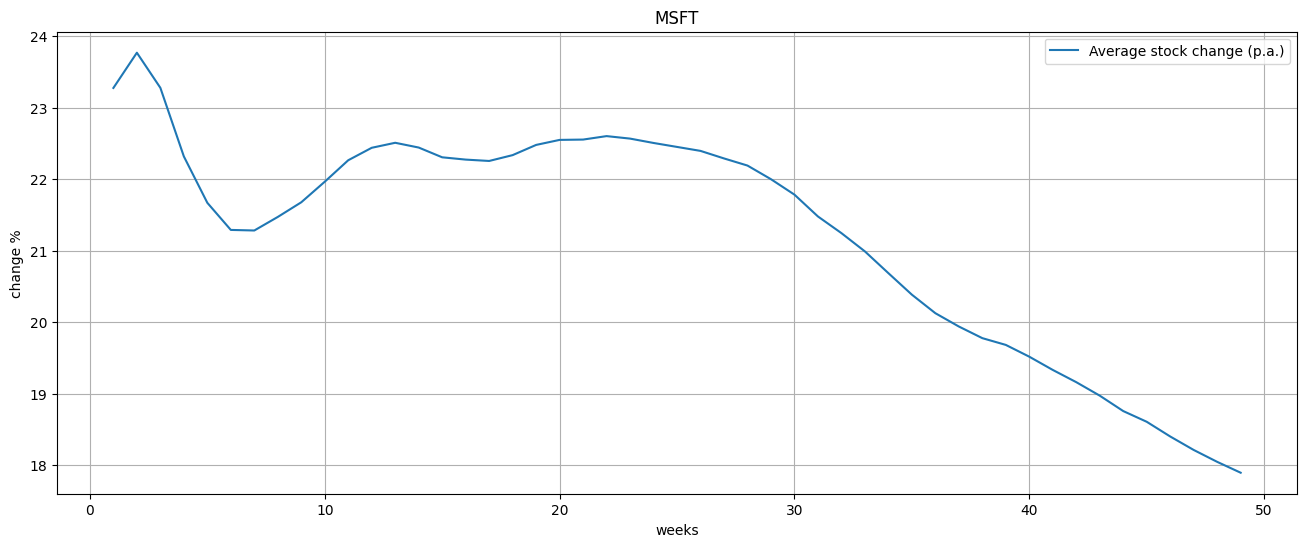

In [8]:
plt.figure(figsize=(16,6))
plt.plot(stock_change, label='Average stock change (p.a.)')
plt.legend(loc='upper right')
plt.title(tickerSymbol)
plt.xlabel('weeks')
plt.ylabel('change %')
plt.grid()
plt.show()
